## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pwd

/c/Users/onkar/Downloads/take home challenges/featurelabs/brazil_ecomm/code


In [3]:
data_dir = '../data/'
filenames = os.listdir(data_dir)
for i, ele in enumerate(filenames):
    print(i, ele)

0 olist_customers_dataset.csv
1 olist_geolocation_dataset.csv
2 olist_orders_dataset.csv
3 olist_order_items_dataset.csv
4 olist_order_payments_dataset.csv
5 olist_order_reviews_dataset.csv
6 olist_products_dataset.csv
7 olist_sellers_dataset.csv
8 processed
9 product_category_name_translation.csv


## Database relationship

In [4]:
Image(url= "https://i.imgur.com/HRhd2Y0.png")

## Unique customers, orders count

In [5]:
df_orders = pd.read_csv(data_dir+filenames[2])

In [6]:
df_orders.shape[0], df_orders['customer_id'].nunique(), df_orders['order_id'].nunique()

(99441, 99441, 99441)

### Note: no repeating orders for same cutomers

## Difference beween customer_id and customer_unique_id

In [7]:
df_cust = pd.read_csv(data_dir+filenames[0])

In [8]:
df_cust['customer_id'].nunique(),df_cust['customer_unique_id'].nunique()

(99441, 96096)

### Just looking at the count, it can be hypothesised as same person using a different email id.

## Multiple business problems can be looked into  
* 1) Given details of an order, predict its value
* 2) Cluster customers and cross reference them with geolocations to find if there is any correlation
* 3) Cluster orders and relationships can be looked into for the get ones that are reviewed vs those are not, review the sellers' frequency in each cluster, similar with products

## Problem 1: Order value prediction

In [9]:
df_payments = pd.read_csv(data_dir+filenames[4])

## Distribution of payment value

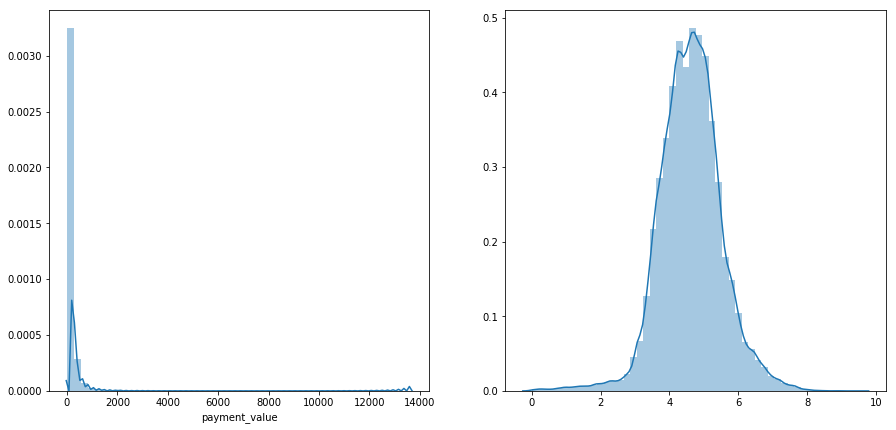

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
sns.distplot(df_payments['payment_value'], ax=ax1)
sns.distplot(np.log(df_payments['payment_value']+1).values, ax=ax2)  ## 9 ordervalues are 0
plt.show()

## There are huge outliers in "payment_value", transformation is suggested.

#### Note: payment_sequentiala customer may pay an order with more than one payment method. If he does so,a sequence will be created to accommodate all payments.